<a href="https://colab.research.google.com/github/patty-13/30_Days_Deeplearning/blob/main/Codes/MLP/Multi_Layered_Preceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Multi Layered Perceptron</h1></center>

Now we will implement the MLP using Keras library you can read more about its documentation here [Keras](https://keras.io). 

We will use MNIST data set to implement this. To refer more about the data set visit this [here](https://en.wikipedia.org/wiki/MNIST_database).

Refer this for more [information](https://www.tensorflow.org/datasets/keras_example)


## Importing Libraries

In [11]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

## Loading the dataset

In [2]:
# Loading data set
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# The info about the dataset
#print(ds_info)

## Creating a Training Pipline

In [3]:
# Normalize the images
# Converting the images to float - > 32 format 
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

#TFDS provide images of type tf.uint8, while the model expects tf.float32. Therefore, you need to normalize images.
ds_train = ds_train.map(    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

#This will  fit the dataset in memory, cache it before shuffling for a better performance.
ds_train = ds_train.cache()

# : For true randomness, set the shuffle buffer to the full dataset size.
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)

# Batch elements of the dataset after shuffling to get unique batches at each epoch.
ds_train = ds_train.batch(256)

# It is good practice to end the pipeline by prefetching for performance 
# Refer (https://www.tensorflow.org/guide/data_performance#prefetching)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


# Repeating the steps for test dataset
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(256)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Creating the model
We plug the TFDS input pipeline into a simple Keras model, compile the model, and train it.

In [8]:
# We want to flaten the shape of the imputs
# Then we add a 128 neurons network 
# After that a output layer with 10 nodes for different classes 
model = tf.keras.models.Sequential([                                    
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
])

# Then we complie the model and optimze it with adam optimizer
# We use a categorical cross entropy loss 
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Then we fit the model for 6 epochs and then pring the result
results = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
235/235 [==============================] - 3s 11ms/step - loss: 0.3819 - sparse_categorical_accuracy: 0.8952 - val_loss: 0.1972 - val_sparse_categorical_accuracy: 0.9452
Epoch 2/6
235/235 [==============================] - 3s 10ms/step - loss: 0.1689 - sparse_categorical_accuracy: 0.9529 - val_loss: 0.1393 - val_sparse_categorical_accuracy: 0.9599
Epoch 3/6
235/235 [==============================] - 3s 14ms/step - loss: 0.1197 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.1132 - val_sparse_categorical_accuracy: 0.9661
Epoch 4/6
235/235 [==============================] - 3s 13ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9737 - val_loss: 0.0963 - val_sparse_categorical_accuracy: 0.9715
Epoch 5/6
235/235 [==============================] - 3s 10ms/step - loss: 0.0728 - sparse_categorical_accuracy: 0.9791 - val_loss: 0.0833 - val_sparse_categorical_accuracy: 0.9742
Epoch 6/6
235/235 [==============================] - 2s 10ms/step - loss: 0.0592 - sparse_categorica

## Model Summary

In [18]:
# The shape of our neural network
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Accuracies of the model

In [9]:
# printing the accuracy of the model
model.evaluate(ds_test)

40/40 [==============================] - 0s 4ms/step - loss: 0.0909 - sparse_categorical_accuracy: 0.9723


[0.09086985141038895, 0.9722999930381775]

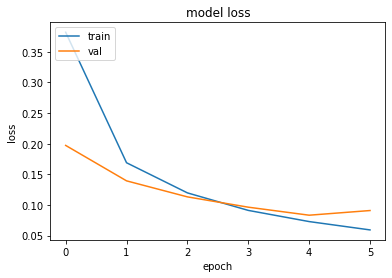

In [17]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()